# Analisis Kampanye Iklan Diskon Akhir Tahun Supermarket Indoapril 

**`Disclaimer: This notebook presents a fictitious story created by the author. The data used for this analysis is sourced from Kaggle and does not represent any real-world entity or event. Any resemblance to actual events or companies is purely coincidental. This notebook is created solely for educational purposes and as a project by the author.`**


## Introduction


Saya Maulana Achsan dan saya adalah Data Analyst dari perusahaan Indoapril. Perusahaan memberikan tugas untuk melakukan analisis data diskon akhir tahun dan dataset ini berasal dari tahun lalu.  Kemudian hasil analisis saya ini sebagai dasar keputusan perusahaan untuk mengambil keputusan pada tahun ini. 

## Business Understanding 

### Latar Belakang
Indoapril adalah perusahaan supermarket yang berada di jerman. Perusahaan ini mempunyai nilai pasar sebesar 100 Miliar Euro. Posisi perusahaan ini di market adalah market follower yang artinya berada di papan tengah dari klasemen persaingan pasar supermarket. Perusahaan ini sering melakukan strategi mempertahankan pasar dengan adanya diskon dan penawaran iklan menarik  lainnya. Karena perusahaan ini berada di tengah pasar perusahaan berusaha untuk melakukan kampanye iklan yang tidak melebihi budget sekaligus efektif dan efisien. 

Tahun lalu perusahaan telah melakukan kampanye iklan diskon akhir tahun. Data dari tahun lalu berhasil disimpan sangat baik oleh perusahaan dan kali ini saya mendapatkan data random sampling dari data kampanye iklan tahun lalu. Perusahaan memberi instruksi kepada saya selaku data analyst didalam perusahaan tersebut untuk menganalisis data dari kampanye iklan tahun lalu tersebut. 

### SMART Framework

SPECIFIC 

Menaikkan response rate iklan perusahaan untuk marketing campaign yang berupa diskon akhir tahun. 

MEASURABLE 

Menaikkan response rate sebesar 15%. 

ACHIEVABLE 

Dengan pertimbangan kita sebagai market follower,sumber daya yang dimiliki dan data iklan tahun lalu yang kita miliki maka kita optimis bisa menaikkan response rate sebesar 15%. 

RELEVANT

Dengan kenaikan response rate iklan ini diharapkan akan memperkuat posisi kita di pasar serta juga memanfaatkan momentum akhir tahun untuk mendapatkan eksposure dan menambah penjualan kita di tahun ini.

TIME-BOUND 

Program kampanye iklan ini akan dilakukan dimulai awal 10 desember dan berakhir 31 desember. 

### Problem Statement

Menaikkan response rate iklan diskon akhir tahun dari supermarket Indoapril sebesar 15% dengan waktu sampai akhir tahun untuk memperkokoh posisi kita dalam pasar dan menambah penjualan di tahun ini. 

### Problem Breakdown 

1.  Berapa persentase response rate tahun lalu? >>> (Visualisasi)
2.  Apakah income class dibawah dari median income class lebih sering merespon iklan kita? >>> (Visualisasi)
3.  Generasi mana yang memiliki respon paling banyak? >>> (Visualisasi)
4.  Apakah rata-rata orang dengan kepemilikan gelar cenderung memiliki respon rate rendah terhadap iklan kita? >>> (Visualisasi)
5.  Bagaimana rata-rata respon iklan terhadap orang-orang sudah menikah atau hidup bersama pasangan ?  apakah mereka cenderung lebih sering melakukan response terhadap iklan kita? >>> (Visualisasi) 
6.  Adakah korelasi antara jumlah anak dengan respon iklan ? Sebagai pertimbangan dengan orang yang mempunyai anak maka biaya hidup lebih besar dan itu akan membuat mereka cenderung untuk merespon iklan iklan dari kita ? >>> (Deskriptif)
7.  Apakah ada perbedaan rata 2 response rate iklan terhadap golongan orang2 yang mempunyai recency <= 10 dan diatas 10  ? Jadi kita akan melakukan testing untuk membuktikan secara statistik bagaimana perbedaan respon iklan terhadap terakhir pembelian user di supermarket itu? >>>(Inferensial) 
8. Bagaimana total proporsi penjualan produk per bulan ? Produk mana yang berhasil terjual paling banyak ? 
9. Dimana customer banyak membeli produk kita ?


## Data Loading

In [1]:
# Importing library yang dibutuhkan pada analisis kali ini

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

### Url Lists

[Link Dataset](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset?select=superstore_data.csv)

[LINK DASHBOARD](https://public.tableau.com/app/profile/maulana.achsan/viz/MarketingDataProject/Dashboard3#2)



In [2]:
# Load Dataset ke Notebook ini
df = pd.read_csv("superstore_data.csv")

# Cek bentuk dari data
df.sample(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,3,263,362,0,27,0,0,1,0,0
1278,2075,1969,Graduation,Married,72460.0,0,0,11/14/2013,56,377,...,80,30,10,1,3,5,7,1,0,0
1401,833,1955,Master,Married,38452.0,1,1,3/30/2014,62,56,...,0,0,2,3,3,0,3,7,0,0
354,1970,1968,Master,Together,34053.0,0,1,10/9/2012,14,63,...,7,0,12,1,3,0,3,8,0,0
25,5985,1965,Master,Single,33168.0,0,1,10/13/2012,0,80,...,0,1,3,3,2,1,4,7,0,0


Ini adalah bentukan dari datanya yang akan kita eksplorasi lebih lanjut di bawah 

## Data Exploration

In [3]:
# Melihat total baris dan kolom
df.shape

(2240, 22)

data ini memiliki 2240 baris dan 22 kolom.  

In [4]:
# cek kolom
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

Dari kolom ini kita akan membuat kolom baru untuk jumlah anak karena kita ingin mengetahui apakah jumlah anak di dalam rumah mempengaruhi dalam variabel. Data ini berisi informasi cukup lengkap serta produk-produk yang sering dibeli dalam satu bulan. Cukup untuk memberikan profile, Bagaimana profile dari orang-orang yang merespon terhadap iklan kita. 

In [5]:
#cek missing value
df.isna().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

Setelah kita cek ternyata ada data yang missing value pada dataset kita. Kita coba telaah lebih lanjut ternyata missing value cuma ada di satu kolom. Kolom income memiliki 24 data yang missing values. Bila kita bandingkan dengan data pada kolom lain yang tidak ada missing value seperti di kolom ini maka saya bisa berkesimpulan bahwa profile dari customer kita ini memang tidak memiliki pendapatan. Kemungkinan besar pelanggan ini adalah ibu rumah tangga atau lansia yang mendapatkan uang dari saudara atau pasangan mereka. 

Keputusannya saya akan mempertahankan data ini dan akan mengisi dataset ini dengan angka 0 untuk mempermudah pembacaan angka oleh sistem komputer.

In [6]:
# Cek duplikasi data 
df.duplicated().sum()

0

Terdapat 0 data duplikat pada dataset ini. Data sudah aman dan tidak ada yang terduplikasi setelah ini kita bisa masuk ke Data Cleaning

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Kita memiliki 22 kolom dan 2240 baris. Data ini tidak ada yang drop atau buang karena ditakutkan kita membutuhkan data itu untuk nantinya. lebih baik dibiarkan saja kolom kolom yang tidak terpakai.  

In [8]:
#mengisi none dengan 0 pada kolom income
df['Income']=df['Income'].fillna(0)
df['Income'].isna().sum()

0

Pada Kolom Income sekarang sudah tidak ada lagi missing value nya. 

In [9]:
#Pengecekan data type pada kolom yang kita pakai. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Data Type sudah benar untuk data tahun itu tidak masalah di angka integer karena untuk kemudahan kita dalam agregasi dan pada data itu hanya terdapat tahun saja tidak ada bulan ataupun tanggal dan waktu.

Penambahan Kolom Jumlah anak. Dikarenakan dataset kita hanya menyediakan jumlah anak kecil dan jumlah anak remaja. Oleh karenanya kita membuat kolom sendiri untuk mempermudah nanti saat perhitungan korelasi 

In [10]:
# Penambahan Kolom Jumlah Anak 
jumlah_anak = []

# Looping sebanyak jumlah length dari salah satu data 
for i in range (len(df['Kidhome'])) :
    # Menjumlahkan Kidhome dan Teen Home kemudian kita masukkan ke dataset list kosong jumlah anak 
    variabel_anak = df['Kidhome'][i] + df['Teenhome'][i]
    #Memasukkan ke list kosong
    jumlah_anak.append(variabel_anak)

df['Jumlah_Anak']= jumlah_anak
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Jumlah_Anak'],
      dtype='object')

## Analysis

### Response Rate Tahun Lalu


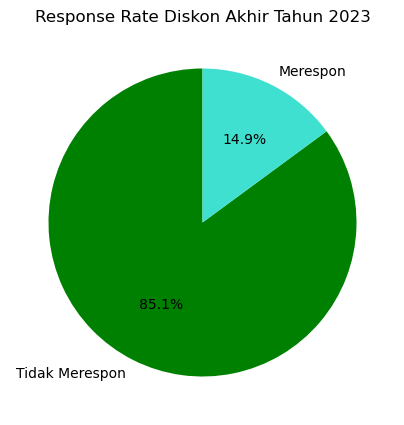

In [11]:
# Menghitung jumlah response rate tahun lalu 

# Total_Count_Value Response 
response_count = df['Response'].value_counts()
label1 = ['Tidak Merespon' , "Merespon"]

# Pembuatan pie chart 
plt.figure(figsize=(5, 5))
plt.pie(response_count, labels=label1, autopct='%1.1f%%', startangle=90, colors=['green','turquoise'])
plt.title('Response Rate Diskon Akhir Tahun 2023')
plt.show()


Response rate akhir tahun lalu menunjukkan bahwa kita sudah mendapatkan 15 % response rate untuk iklan kita. Dikarenakan tahun ini kita sudah mengetahui data tentang tahun lalu maka kita optimis bisa menaikkan 2kali lipat response rate dari tahun lalu dan tahun ini menjadi 30% dengan optimasi dari data tahun sebelumnya. Walaupun data menunjukkan mayoritas customer tidak merespon diskon akhir tahun yaitu di angka 85%, tahun ini kita akan memperbaiki itu dengan membuat profile dari pelanggan tahun lalu yang sudah merespon diskon akhir tahun. Setelah itu produk-produk yang diskon juga akan cocok dengan profile customer kita serta pemilihan konten iklan kreatifitas akan sesuai dengan profile pelanggan kita yang merespon.

### Apakah income class dibawah dari median lebih sering merespon iklan kita? >>> (Visualisasi)

Profiling pelanggan yang merespon produk kita bisa jadi acuan untuk melakukan kampanye diskon akhir tahun (DAT) di tahun ini dengan lebih baik. Mengapa kita menggunakan median untuk acuan. Median menunjukkan titik tengah dari populasi. Jadi kita bagi data ini menjadi 2 dan kemudian bisa melihat profile dari pelanggan kita yang merespon iklan. Apakah mereka bagian dari 50 % penduduk yang memiliki pendapatan rendah atau memiliki pendapatan di tinggi di atas 50% populasi. Karena pada dasarnya selera produk, iklan, visualisasi orang yang berpendapatan tinggi akan cenderung berbeda ketika pendapatan juga berbeda. Kita bisa menentukan segmen mana yang akan kita sasaran kita dan produk yang sesuai.  

In [12]:
df['Income'].median()

51075.0

Median income dari sample adalah 51.000 euro / tahun. 

In [13]:
df['Income'].skew()

6.329309413621676

Skewness data ini 6,3 yang berarti data ini tidak terdistribusi normal. Jadi kita harus membuang dulu Outliernya. 

In [14]:
# Tukey cek IQR
q1 = df["Income"].quantile(0.25)
q3 = df["Income"].quantile(0.75)

# Penentuan Outlier dengan Inter quartile range(IQR) 
IQR = q3-q1 

#Memakai IQR 3 karena data tidak terdistribusi normal jadi range masih jauh. 
Lower_Boundary = q1 - (3 * IQR) 
Upper_Boundary = q3 + (3 * IQR) 

print(Upper_Boundary)
print(Lower_Boundary)

168993.0
-65981.25


Jadi Upper Boundary sudah ditentukan kita bisa memfilter dan tidak memakai data-data outlier. Data yang akan kita pakai adalah data orang-orang yang mempunyai  pendapatan di bawah 168993 Euro per tahun

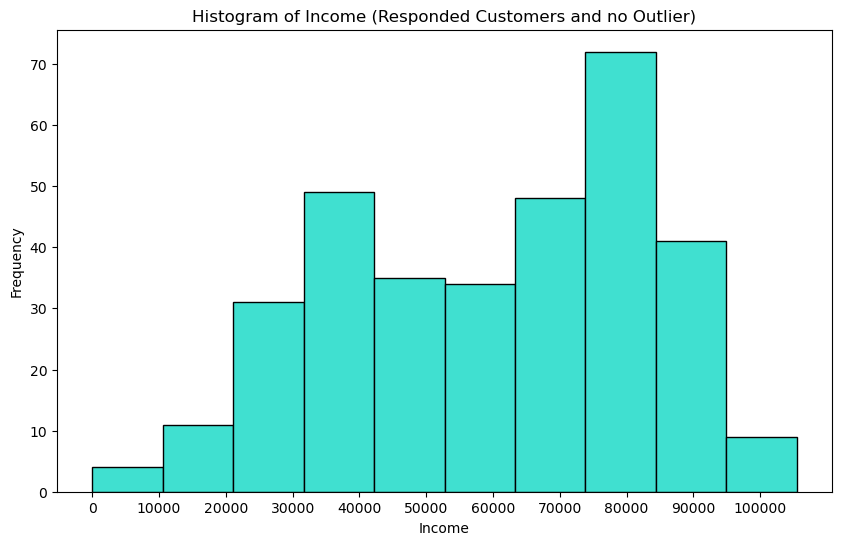

In [15]:

# Memfilter data Income di bawah Batas Outlier Atas
filtered_df = df[(df['Income'] <= Upper_Boundary) & (df['Response']== 1 )]

# Membuat histogram dengan data yang sudah difilter
plt.figure(figsize=(10, 6))
# membagi 20 dari histogram
plt.hist(filtered_df['Income'], bins=10, color='turquoise', edgecolor='black')
# pemberian tittle dan label
plt.title('Histogram of Income (Responded Customers and no Outlier)')
# deskripsi sumbu x
plt.xlabel('Income')

# Mengatur label sumbu X per 10 ribu
plt.xticks(np.arange(0, 110000, 10000))
# deskripsi sumbu y
plt.ylabel('Frequency')
plt.show()


Median di angka 50000 dan data histogram orang-orang yang melakukan respon di atas median lebih banyak. Ini bisa lihat dari jumlah histogram di atas value 50 ribu terdapat nilai nilai yang tinggi dibandingkan kita melihat data di kiri median yaitu 50000 ke bawah. Disini saya bisa menyimpulkan bahwa orang-orang yang respon iklan kita itu cenderung orang dengan pendapatan menengah ke atas atau orang dengan level level jabatan tinggi di perusahaan. Jadi kita untuk membuat iklan dan produk lebih memikirkan orang-orang yang mempunyai income di atas median itu seperti apa. Hangout dimana? Makanan apa. Kita harus pahami ini untuk membuat penawaran diskon akhir tahun menarik untuk pelanggan kita. 

### Generasi mana yang memiliki respon iklan paling banyak? >>> (Visualisasi)

Klasifikasi generasi cenderung lebih mudah kita untuk menentukan bagaimana selera dari konsumen kita. Karena rentang usia, hobby, lagu kesukaan dan faktor-faktor lain yang cenderung mirip. Berdasarkan pendapat ini kita akan mengklasifikasi tahun lahir pelanggan berdasarkan generasi. 
 kita memakai sumber klasifikasi dari website ini https://www.parents.com/parenting/better-parenting/style/generation-names-and-years-a-cheat-sheet-for-parents/. 

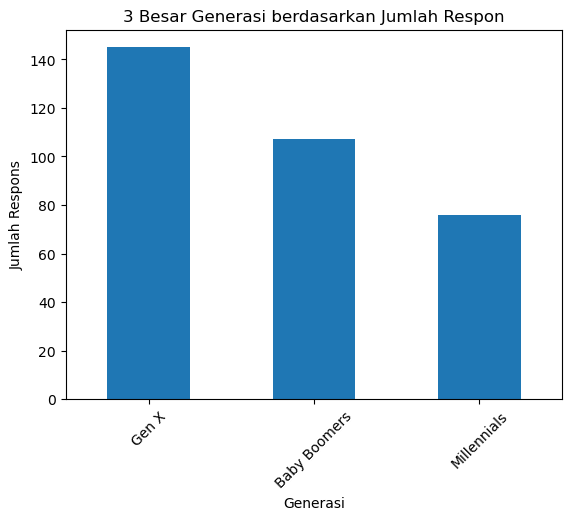

In [16]:
"""Pembuatan kolom baru untuk pengelompokan """
generasi = []

# Loooping dan mendeskripsikan setiap tahun lahir dan memberikan klasifikasi terhadap tahun lahir itu

for i in df['Year_Birth']:
    # Dibawah 1900 kita definisikan tidak tahu
    if i <= 1900:
        generasi.append('Unknown Gen')
    #Greatest Gen
    elif 1900 < i <= 1927:
        generasi.append('Greatest Gen')
    # Silent Gen
    elif 1928 <= i <= 1945:
        generasi.append('Silent Gen')
    # Baby Boomers
    elif 1946 <= i <= 1964:
        generasi.append('Baby Boomers')
    # Gen X
    elif 1965 <= i <= 1980:
        generasi.append('Gen X')
    # Milenial
    elif 1981 <= i <= 1996:
        generasi.append('Millennials')
    # Gen Z
    elif 1997 <= i <= 2012 :
        generasi.append('Gen Z')
    # Unknown Gen Again
    else : 
        generasi.append('Unknown Gen')

   

# Menambahkan hasil ke DataFrame sebagai kolom baru
df['Generasi'] = generasi

# Kita Agregasi dulu kolom generasi dan response
group3 = df.groupby('Generasi')['Response'].sum().sort_values(ascending=False)
# Menampilkan 3 besar saja
group3agregasi = group3.head(3)

# Pembuatan figure untuk 3 besar Generasi yang memberikan respon tertinggi
group3agregasi.plot (kind='bar')
# Nama Figure
plt.title('3 Besar Generasi berdasarkan Jumlah Respon')
# Nama Label pada sumbu x
plt.xlabel('Generasi')
# Nama Label pada sumbu y 
plt.ylabel('Jumlah Respons')
# membuat kejelasan pembacaan pada sumbu y supaya tidak horizontal
plt.xticks(rotation=45)
#execute
plt.show()

Kita mengetahui bahwa Generasi X itu lebih merespons iklan kita lebih banyak dan cenderung jauh unggul dibandingkan dengan generasi lain. Gen X itu memiliki rentang usia sekitar 45 - 55 tahunan di angka ini harusnya orang-orang sudah memiliki anak yang sudah dewasa dan harusnya sudah mapan untuk usia segini cocok dengan histogram kita yang tadi. Asumsi saya orang ini cenderung merespon iklan kita karena ingin tetap hemat dengan diskon diskon dari kita. Dan juga akhir tahun mereka berharap bahwa anak-anak mereka akan datang ke rumah serta meramaikan rumah untuk perayaan akhir tahun dan natal seperti budaya yang dimiliki oleh negara-negara eropa lainnya. Maka mereka harus membeli produk lebih banyak dan memanfaatkan diskon serta masih tetap hemat dengan budget yang dimiliki.

### Apakah rata-rata orang dengan kepemilikan gelar cenderung memiliki respon rate rendah terhadap iklan kita? >>> (Visualisasi)

Selera orang pasti berbeda. Dengan orang memiliki gelar mereka cenderung berbeda dari orang yang tidak memiliki gelar. Jadi kita harus menyesuaikan untuk iklan dan produk sesuai dengan pelanggan kita. Konsumsi konten,produk dan hiburan dari mereka akan cenderung berbeda juga. Ini untuk desain pada saat penampilan konten. Apakah kita menampilkan branding sebagai orang pintar atau orang dengan pekerja informal ini sangat berpengaruh terhadap keputusan pembelian. Karena kita sudah tahu orang ini adalah memiliki income tinggi namun kita harus pastikan mereka berpendidikan tidak. Kalau gampangnya secara indonesia itu konten iklannya receh atau tidak . Mungkin ini bahasa yang tepat.  

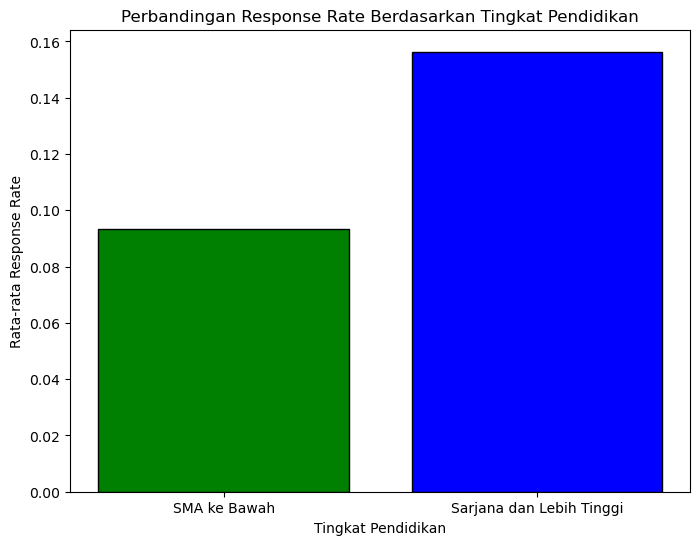

In [17]:

"""Disini klasifikasi dulu menjadi 2 kelompok. Orang yang memilki gelar dan orang yang sekolah sampai SMA """
# Mengelompokkan data menjadi dua kelompok
sma_ke_bawah = df[df['Education'].isin(['Basic', '2n Cycle', 'High School'])]['Response'].mean()
sarjana_ke_atas = df[df['Education'].isin(['Graduation', 'Master', 'PhD'])]['Response'].mean()

# Menyiapkan variabel untuk bar plot
labels = ['SMA ke Bawah', 'Sarjana dan Lebih Tinggi']
response_rates = [sma_ke_bawah, sarjana_ke_atas]

# Membuat bar plot 
plt.figure(figsize=(8, 6))
# definisikan seperti apa plotnya
plt.bar(labels, response_rates, color=['green', 'blue'], edgecolor='black')
# menulis judul
plt.title('Perbandingan Response Rate Berdasarkan Tingkat Pendidikan')
# nama sumbu y
plt.ylabel('Rata-rata Response Rate')
# nama sumbu x
plt.xlabel('Tingkat Pendidikan')
#execute
plt.show()



Sangat Menarik. Profile yang sudah kita kumpulkan yaitu. Bergaji tinggi lebih dari 50  ribu euro per tahun dan gen X.  Ternyata orang yang berpendidikan tinggi cenderung merespon lebih banyak dari pada orang yang tidak memiliki gelar. Pendapat saya ini dikarenakan mereka punya waktu untuk mencari diskon, meskipun mereka sibuk dalam pekerjaan mereka. Namun kesadaran mengenai pengeluaran mungkin membuat mereka mencari diskon akhir tahun ini. Apabila kita bayangkan pekerjaan mereka maka mereka itu sudah level senior atau managerial karena memiliki gelar juga. jadi mungkin sudah mempersiapkan pesta untuk perayaan natal dan tahun baru bersama keluarga.  



### Bagaimana rata-rata respon iklan terhadap orang-orang sudah menikah atau hidup bersama pasangan ?  apakah mereka cenderung lebih sering melakukan response terhadap iklan kita? >>> (Visualisasi)


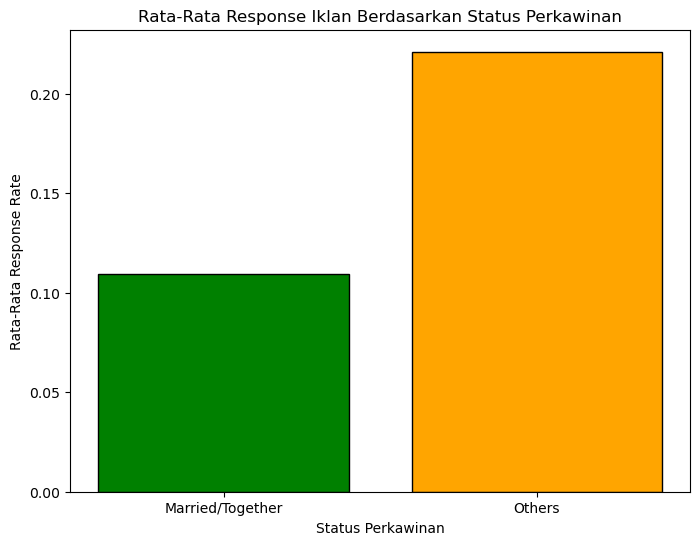

In [18]:
# Mengelompokkan data menjadi dua kategori: Married/Together dan lainnya
married_together = df[df['Marital_Status'].isin(['Married', 'Together'])]['Response'].mean()
others = df[~df['Marital_Status'].isin(['Married', 'Together'])]['Response'].mean()

# Menyiapkan data untuk bar plot
labels = ['Married/Together', 'Others']
response_rates = [married_together, others]

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, response_rates, color=['green', 'orange'], edgecolor='black')
plt.title('Rata-Rata Response Iklan Berdasarkan Status Perkawinan')
plt.ylabel('Rata-Rata Response Rate')
plt.xlabel('Status Perkawinan')
plt.show()


Kita rekap dulu profilingnya. Pendapatan lebih dari 50K / Tahun, Gen X, dan berpendidikan tinggi (telah masuk universitas) . Saya juga berasumsi bahwa mereka melakukan ini karena untuk keluarga atau kumpul bersama anaknya. Ternyata asumsi saya terbantah disini. Perbedaan mencolok dibuktikan response rate tertinggi malah dilakukan oleh orang2 yang tidak memiliki hubungan (hidup sendiri). Karena orang orang yang sudah married cenderung kurang merespon terhadap iklan kita dan malah orang-orang dengan status hidup sendiri malah belanja lebih banyak menggunakan diskon. 
Jadi berdasarkan dataset profile pelanggan kita yang melakukan response terbanyak terhadap diskon akhir tahun yaitu. 
1. Orang berpendapatan lebih dari median (lebih dari 50K) per tahun
2. Gen X 
3. Berpendidikan Tinggi (Mempunyai gelar pendidikan)
4. Hidup Sendiri.

Setelah kita mengetahui data-data profile ini harusnya perlu ditelusuri lebih lanjut mengenai produk apa yang mereka beli, beli dimana produknya itu supaya kita lebih jelas untuk target market kita yang sensitif terhadap diskon akhir tahun kita. 

###  Adakah korelasi antara jumlah anak dengan respon iklan ? Sebagai pertimbangan dengan orang yang mempunyai anak maka biaya hidup lebih besar dan itu akan membuat mereka cenderung untuk merespon iklan iklan dari kita ? >>> (Deskriptif)


Kita disini melakukan pendekatan korelasi dengan korelasi kendal tau karena data kita adalah data kategorikal 

In [19]:
# dengan menggunakan confidence level 95% 

# pemilihan korelasi kendal tau 
corr_tau, pval_k = stats.kendalltau(df['Jumlah_Anak'], df['Response'])   # Kendall (tau)

print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: -0.17, p-value: 7.781906734783246e-17


Pada confidence level 95%,  p value yang kita dapat sangat sangat kecil sekali yaitu 7,8 dikali dengan pangkat minus 17, nilai itu lebih kecil dibandingkan 0,05 . Yang berarti kita menolak bahwa tidak ada korelasi antara Jumlah anak dan response. Statistik menunjukkan bahwa kedua variabel itu berkorelasi. Namun untuk mengetahui apakah data itu berkorelasi kuat atau berkorelasi lemah maka kita perlu melihat pada tau correlation. Tau correlation menunjukkan angka -0,17 yang berarti korelasi ke arah negatif namun korelasi ini lemah dan bisa kita abaikan. Kesimpulannya jumlah anak berkorelasi dengan jumlah response namun insight ini bisa kita abaikan karena korelasinya lemah dari sudut pandang praktikal. 

### Apakah ada perbedaan rata 2 response rate iklan terhadap golongan orang2 yang mempunyai recency <= 10 dan diatas 10  ? Jadi kita akan melakukan testing untuk membuktikan secara statistik bagaimana perbedaan respon iklan terhadap terakhir pembelian user di supermarket itu? >>>(Inferensial)

Recency rate merupakan kapan terakhir kali seseorang belanja dengan kita. Jika recency rate itu bernilai 1 maka dia terakhir kali ke supermarket kita adalah kemarin. Berarti kita bisa memberikan label bahwa orang itu sering belanja di kita atau loyal dengan supermarket  kita karena dia terakhir bertransaksi kemarin. Semakin tinggi nilai recency rate berarti mereka itu jarang bertransaksi dengan kita. Kemungkinan mereka itu orang jauh atau datang ke tempat kita karena diskon saja. Bukan orang sekitar supermarket.


H0 = Tidak ada perbedaan rata-rata response rate untuk pelanggan dengan recency <= 10 

H1 = Ada perbedaan rata-rata response rate untuk pelanggan dengan recency rate > 10 

Kita akan testing apakah orang yang sering datang ke supermarket kita cenderung merespon diskon akhir tahun atau tidak. Kita menggunakan alpha 0,05 atau confidence level 95% dan menggunakan test statistik T test. 

In [20]:
# Slicing data menjadi dua kelompok berdasarkan Recency
group1 = df[df['Recency'] <= 10]['Response']
group2 = df[df['Recency'] > 10]['Response']

# Hitung rata-rata response rate untuk setiap kelompok (opsional, untuk informasi tambahan)
# Menghitung rata-rata response rate untuk recency kurang dari 10
mean_group1 = group1.mean()

# Menghitung rata-rata
mean_group2 = group2.mean()

# Lakukan independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Output hasil

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretasi hasil
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print("Ada perbedaan yang signifikan dalam response rate antara dua kelompok pelanggan.")
else:
    print("Tidak ada perbedaan yang signifikan dalam response rate antara dua kelompok pelanggan.")


T-statistic: 7.775772514208634
P-value: 1.134910788053718e-14
Ada perbedaan yang signifikan dalam response rate antara dua kelompok pelanggan.


Setelah melakukan perhitungan rata2 dari kedua golongan maka bisa menyimpulkan bahwa kita mendapat p-value yang sangat kecil sekali yaitu 1,13 dikali 10 pangkat minus 14. Nilai ini sangat kecil bila kita bandingkan dengan 0,05. Kita bisa menyimpulkan bahwa ada perbedaan response rate terhadap orang yang sering datang ke supermarket kita dan. Maka kita menyimpulkan kita menolak H0 dan mengambil H1. Ada perbedaan response rate untuk pelanggan di atas recency 10 hari. 

### Total Produk Terjual antara Semua Customer dan Customer yang Merespon Iklan 

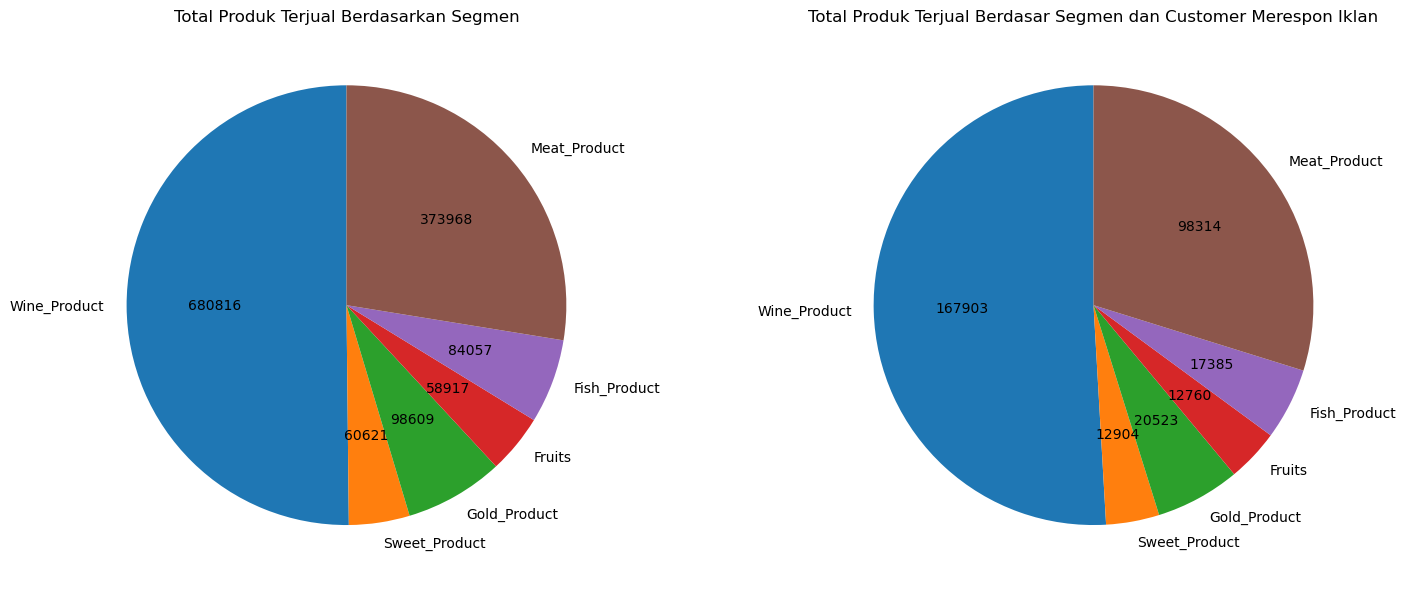

In [21]:
# Data untuk plot (sesuaikan dengan dataframe)
label = ['Wine_Product', 'Sweet_Product', 'Gold_Product', 'Fruits', 'Fish_Product', 'Meat_Product']
columns_butuh = ['MntWines', 'MntSweetProducts', 'MntGoldProds', 'MntFruits', 'MntFishProducts', 'MntMeatProducts']

# Total Values For each column in one line 
nilai_pie = df[columns_butuh].sum()

# total product where customer responds
nilai_pie_respon = df[columns_butuh][df['Response'] == 1].sum()

# Fungsi untuk menampilkan nilai absolut pada pie chart
def absolute_value(val):
    return f'{val:.0f}'

# Create a Figure
plt.figure(figsize=(15, 6))

# Subplot 1
plt.subplot(1, 2, 1)
# define the graph 
plt.pie(nilai_pie, labels=label, startangle=90, autopct=lambda p: absolute_value(p * sum(nilai_pie) / 100))
plt.title('Total Produk Terjual Berdasarkan Segmen')

# subplot 2
plt.subplot(1, 2, 2)
# define graph 2 
plt.pie(nilai_pie_respon, labels=label, startangle=90, autopct=lambda p: absolute_value(p * sum(nilai_pie_respon) / 100))
plt.title('Total Produk Terjual Berdasar Segmen dan Customer Merespon Iklan')

plt.tight_layout()
plt.show()


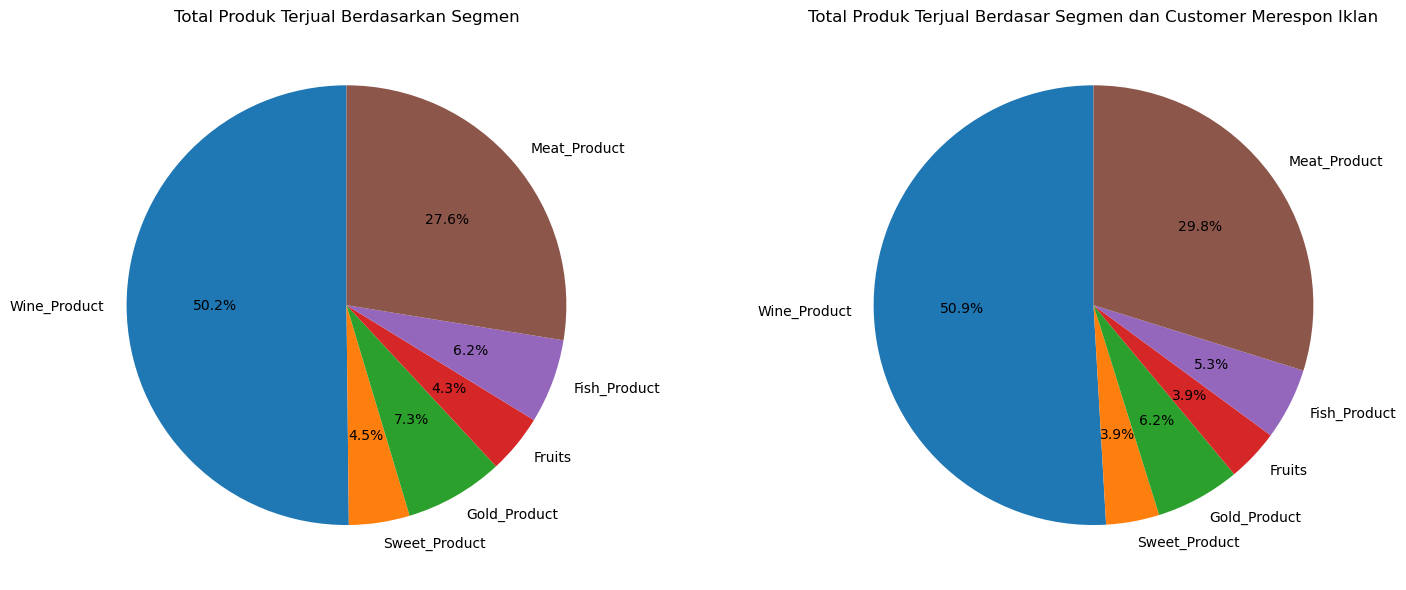

In [22]:
# Data untuk plot (sesuaikan dengan dataframe)
label = ['Wine_Product', 'Sweet_Product', 'Gold_Product', 'Fruits', 'Fish_Product', 'Meat_Product']
columns_butuh = ['MntWines', 'MntSweetProducts', 'MntGoldProds', 'MntFruits', 'MntFishProducts', 'MntMeatProducts']

# Total Values For each column in one line 
nilai_pie = df[columns_butuh].sum()

# total product where customer responds
nilai_pie_respon = df[columns_butuh][df['Response'] == 1].sum()

# Create a Figure
plt.figure(figsize=(15, 6))

# Subplot 1
plt.subplot(1, 2, 1)
# define the graph 
plt.pie(nilai_pie, labels=label, startangle=90, autopct='%1.1f%%')
plt.title('Total Produk Terjual Berdasarkan Segmen')

# subplot 2
plt.subplot(1, 2, 2)
# define graph 2 
plt.pie(nilai_pie_respon, labels=label, startangle=90, autopct='%1.1f%%')
plt.title('Total Produk Terjual Berdasar Segmen dan Customer Merespon Iklan')

plt.tight_layout()
plt.show()


Secara presentase komposisi dari penjualan produk terhadap orang yang merespon iklan dan total seluruh customer bisa kita pastikan bahwa komposisi urutan masih menjadi dominasi dari wine product dan meat product. Oleh karena itu untuk melakukan kampanye marketing pada periode selanjutnya yang perlu kita lakukan adalah fokus terhadap produk yang memberikan dampak tinggi kepada segmen-segmen yang memberikan total produk terjual yang tinggi. Pada aktivitasnya orang orang yang merespon iklan kita juga lebih cenderung suka terhadap produk-produk wine atau produk daging. Ini telah terbukti bahwa segmen produk tersebut harusnya memberikan minat tertentu kepada calon pembeli yang akan datang. 

### Perbandingan Channel Penjualan Terhadap Response Marketing Campaign

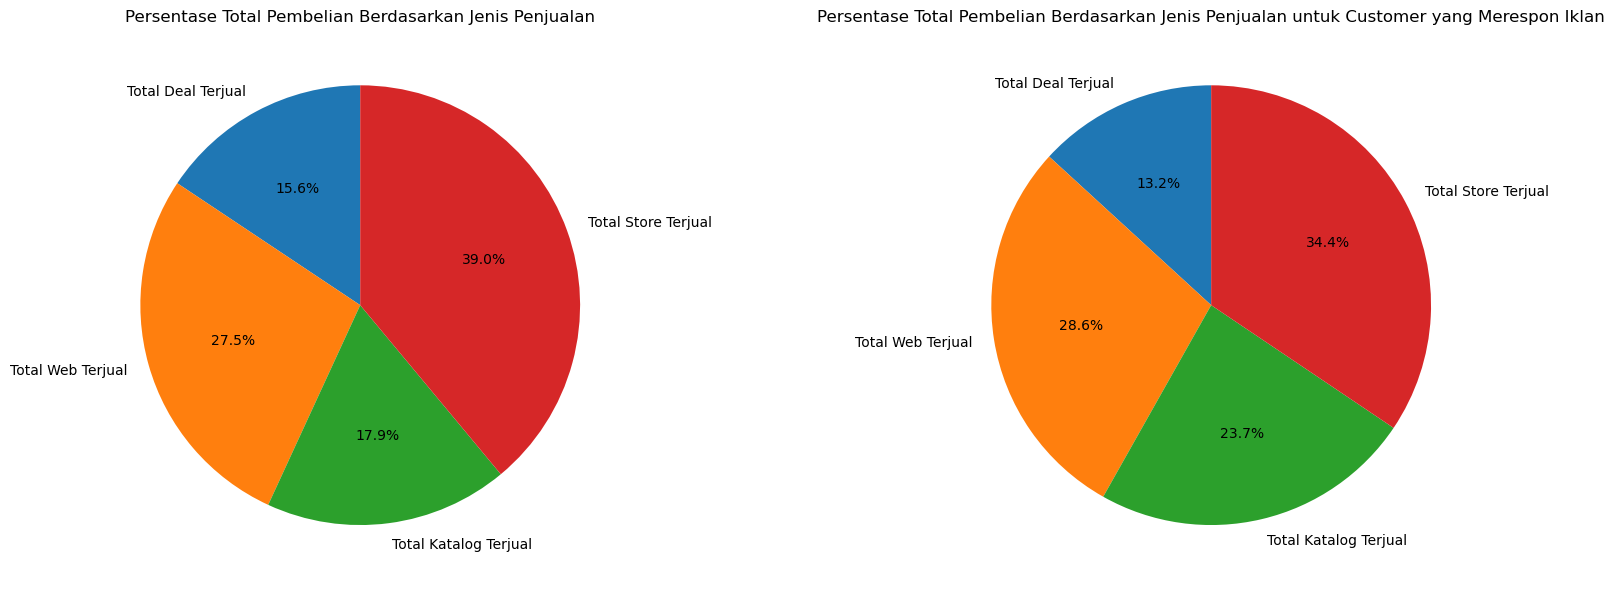

In [23]:
# define the label 

label = ["Total Deal Terjual", "Total Web Terjual" , "Total Katalog Terjual", "Total Store Terjual"]

# define the value 
columns_o = ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]

# Total Values For each column in one line 
nilai_pie = df[columns_o].sum() 

# total product where customer responds
nilai_pie_respon = df[columns_o][df['Response']==1].sum()

#Create a Figure
plt.figure(figsize=(17,6))

# Subplot 1 

plt.subplot(1,2,1)
# define the graph 
plt.pie(nilai_pie, labels=label, startangle=90,autopct='%1.1f%%')
plt.title('Persentase Total Pembelian Berdasarkan Jenis Penjualan')

# subplot 2 

plt.subplot(1,2,2)

# define graph 2 
plt.pie(nilai_pie_respon, labels=label, startangle=90,autopct='%1.1f%%')
plt.title('Persentase Total Pembelian Berdasarkan Jenis Penjualan untuk Customer yang Merespon Iklan')

plt.tight_layout()
plt.show()

Data menunjukkan tempat terjadi transaksi terbanyak terdapat pada Store dan Web. Namun kita tidak boleh memandang sebelah mata terhadap deal dan katalog, karena 40% total penjualan berasal dari Deal dan Katalog. Jika kita melihat komposisi dari orang yang merespon iklan kita maka kemungkinan marketing campaign selanjutnya bisa dilakukan di semua platform. Meskipun deal terjual itu tidak lebih dari 15% namun komposisi 13% cukup untuk membuktikan bahwa kita harus tetap melakukan campaign dengan deals-deals tertentu supaya pelanggan bisa memilih tempat atau program marketing apayang bisa mereka lakukan pada kampanye promosi yang akan datang. 

## Kesimpulan



### Rekap

Setelah kita melakukan uji-uji statistik dan visualisasi data ini adalah rekapan dari data temuan saya. 
1. Response rate tahun lalu 15%.
2. Median dari income adalah 50000 euro per tahun. 
3. Gen X menjadi orang-orang yang memiliki reponse rate tertinggi dibandingkan yang lainnya. 
4. Orang dengan gelar cenderung memiliki responsifitas terhadap diskon akhir tahun lalu
5. Orang single mempunyai response rate terhadap iklan lebih tinggi dibanding yang berkeluarga dan memiliki pasangan. 
6. Tidak ada korelasi antara punya anak dan response rate
7. Recency Rate rendah atau sering ke supermarket akan merespon dengan baik diskon akhir tahun. 
8. Perlunya fokus untuk melakukan marketing kepada segmen wine dan segmen daging 
9. Penjualan Store dan penjualan melalui web mendapatkan lebih dari 60% dari total penjualan. 

### Insight

Untuk Pemilihan produk diskon maka kita memerlukan pertimbangan generasi dari pelanggan kita dahulu. Setelah itu kita harus menampilkan konten iklan kita cenderung konten-konten untuk orang berpendidikan mulai dari visualnya dan kemudian aktor atau figur gambarnya. Setelah itu coba pilih segmen segmen produk yang menengah ke atas karena yang merespon diskon adalah orang dengan income rate diatas median. Jangan terlalu diskon produk-produk murah yang mempunyai segmen orang dengan pasar segmen menengah ke bawah. Dengan ini kita akan mendapatkan kesesuaian antara produk dan target market yang cocok. 
Lebih baik kita fokuskan diskon kepada pelanggan pelanggan yang memiliki recency rate dibawah 10 dibandingkan pelanggan yang memiliki recency di atas 10. Sudah terbukti diskon kita di akhir tahun lebih terespon kepada orang-orang yang memiliki recency rate yang rendah. 
Memberikan diskon atau marketing campaign kepada segmen tertentu yang lebih besar misalkan daging dan wine. Diharapkan dengan ini maka orang-orang akan aware dengan adanya diskon yang tinggi sehingga akan ada kenaikan dari response rate iklan kita. Kita perlu juga fokus kepada store dan website untuk melakukan kampanye nanti, meskipun tidak dipungkiri deals yang terjual dan katalog memberikan 40% total penjualan juga.  

### Summary

Dengan mengaplikasikan target diskon akhir tahun ini sesuai dengan profiling dari customer yang memberikan respon positif pada diskon tahun lalu maka kita bisa meningkatkan respon rate 2 kali lipat. Karena kita tidak membuat diskon produk untuk orang-orang yang tidak memberikan respon positif pada diskon kita tahun lalu. Perlu dilakukan analisis lebih lanjut mengenai customer yang memiliki hubungan pernikahan karena mereka mempunyai total konsumsi wine dan buah tertinggi untuk mengetahui insight lebih dalam. 

In [24]:
# menyimpan dataset sebagai nilai folder baru
df.to_csv("maulana_achsan_df.csv", index=False)

